In [0]:
import numpy as np
import tensorflow as tf
from keras.layers import Conv2D, Dense,InputLayer, Conv2DTranspose, Dropout, Activation, Input, Flatten, Add, Deconv2D, MaxPool2D
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import os
from glob import glob
import re
import random
import scipy.misc


%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

x_train = x_train / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [0]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [0]:
cnn1 = Sequential()
cnn1.add(InputLayer((x_train.shape[1], x_train.shape[2],x_train.shape[3])))
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(MaxPool2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
cnn1.layers.remove
print(cnn1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
history = cnn1.fit(x_train, y_train, verbose=2, epochs=5)

Epoch 1/5
 - 14s - loss: 0.4005 - acc: 0.8577
Epoch 2/5
 - 12s - loss: 0.2762 - acc: 0.8988
Epoch 3/5
 - 12s - loss: 0.2377 - acc: 0.9125
Epoch 4/5
 - 12s - loss: 0.2064 - acc: 0.9232
Epoch 5/5
 - 12s - loss: 0.1805 - acc: 0.9330


In [0]:
test_loss, test_acc = cnn1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 108us/step
Test accuracy: 0.9138


In [0]:
X_input = Input((x_train.shape[1], x_train.shape[2], x_train.shape[3]))
X = Conv2D(32,(3,3), activation='relu')(X_input)
X = MaxPool2D(pool_size=(2, 2))(X)
X = Dropout(0.2)(X)
X = Flatten()(X)
X = Dense(128, activation='relu')(X)
X = Dense(10, activation='softmax')(X)

model1 = Model(inputs = X_input, outputs = X)
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total para

In [0]:
l1 = cnn1.get_layer(name='conv2d_93')
l2 = cnn1.get_layer(name='dense_24')
l3 = cnn1.get_layer(name='dense_25')

In [0]:
model1.get_layer(name='conv2d_23').set_weights(l1.get_weights())
model1.get_layer(name='dense_18').set_weights(l2.get_weights())
model1.get_layer(name='dense_19').set_weights(l3.get_weights())

In [0]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 72us/step
Test accuracy: 0.9084


In [0]:
vgg_base_model = VGG16()

In [0]:
vgg_base_model.summary()
for layer in vgg_base_model.layers:
    layer.trainable=False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
 
skip1 = vgg_base_model.get_layer('block4_pool').output
print("skip1 shape ", skip1.shape)
skip2 = vgg_base_model.get_layer('block3_pool').output

X = vgg_base_model.get_layer('block5_pool').output
# X = Conv2D(4096, kernel_size=(4,4), strides=(4,4))(X)
X = Conv2D(2, kernel_size=(1,1), strides=(1,1), padding='same')(X)
# X = Conv2D(4096, kernel_size=(1,1), padding='same')(X)
# X = Conv2D(2, kernel_size=(1,1), padding='same')(X)
print(X.shape)
X = Conv2DTranspose(2, kernel_size=(4,4), strides=(2,2), padding='same')(X)
# shape should be as skip1
print(X.shape)
skip1 = Conv2D(2,kernel_size=(1,1), strides=(1,1), activation=None)(skip1)
print("skip1 shape ", skip1.shape)
X = Add()([X, skip1])
print(X.shape)

X = Conv2DTranspose(2, kernel_size=(4,4), strides=(2,2),
                   padding='same')(X)

print(X.shape)
skip2 = Conv2D(2,kernel_size=(1,1), strides=(1,1), activation=None)(skip2)
print("skip2 shape ", skip2.shape)
X = Add()([X, skip2])
print(X.shape)
X = Conv2DTranspose(2, kernel_size=(4,4), strides=(2,2),
                   padding='same')(X)
X = Conv2DTranspose(2, kernel_size=(4,4), strides=(2,2),
                   padding='same')(X)
X = Conv2DTranspose(2, kernel_size=(4,4), strides=(2,2),
                   padding='same')(X)
X = Activation('softmax')(X)
print(X.shape)

new_model = Model(inputs = vgg_base_model.input, outputs=X, name='fcn8')

skip1 shape  (?, 14, 14, 512)
(?, 7, 7, 2)
(?, ?, ?, 2)
skip1 shape  (?, 14, 14, 2)
(?, 14, 14, 2)
(?, ?, ?, 2)
skip2 shape  (?, 28, 28, 2)
(?, 28, 28, 2)
(?, ?, ?, 2)


In [0]:
new_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_23[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [0]:
rows = 7
cols= 7
strides = 2
kernel_size=4
output_padding = 0
padding=1
new_rows = ((rows - 1) * strides + kernel_size
            - 2 * padding + output_padding)
new_cols = ((cols - 1) * strides + kernel_size
            - 2 * padding + output_padding)
print(new_rows, new_cols)

14 14


In [0]:
new_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
!unzip data_road.zip

In [0]:
def bc_img(img, s=1.0, m=0.0):
    img = img.astype(np.int)
    img = img * s + m
    img[img > 255] = 255
    img[img < 0] = 0
    img = img.astype(np.uint8)
    return img

def process_gt_image(gt_image):
    background_color = np.array([255, 0, 0])

    gt_bg = np.all(gt_image == background_color, axis=2)
    gt_bg = gt_bg.reshape(gt_bg.shape[0], gt_bg.shape[1], 1)

    gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)
    return gt_image

def batch_generator(image_paths, label_paths, batch_size):
    random.shuffle(image_paths)
    batch_size=1
    for batch_i in range(0, len(image_paths), batch_size):
        images = []
        gt_images = []
        for image_file in image_paths[batch_i:batch_i + batch_size]:

            gt_image_file = label_paths[os.path.basename(image_file)]
            print(image_file, gt_image_file)

            image = scipy.misc.imread(image_file)
            gt_image = scipy.misc.imread(gt_image_file)

            image = scipy.misc.imresize(image, image_shape)
            gt_image = scipy.misc.imresize(gt_image, image_shape)

            contrast = random.uniform(0.85, 1.15)  # Contrast augmentation
            bright = random.randint(-45, 30)  # Brightness augmentation
    #         image = bc_img(image, contrast, bright)

            gt_image = process_gt_image(gt_image)
            images.append(image)
            gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)

In [0]:
data_folder='data_road/training/'
image_paths = glob(os.path.join(data_folder, 'image_2', '*.png'))
label_paths = {
    re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path
    for path in glob(os.path.join(data_folder, 'gt_image_2', '*_road_*.png'))}

batch_size=2

image_shape = (224,224,3)

new_model.fit_generator(batch_generator(image_paths, label_paths, batch_size),
                        100,
                    epochs=5,
                    max_q_size=1,
                    verbose=1)

In [0]:
def gen_batch_function(data_folder, image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        image_paths = glob(os.path.join(data_folder, 'image_2', '*.png'))
        label_paths = {
            re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path
            for path in glob(os.path.join(data_folder, 'gt_image_2', '*_road_*.png'))}

        random.shuffle(image_paths)
        for batch_i in range(0, len(image_paths), batch_size):
            images = []
            gt_images = []
            for image_file in image_paths[batch_i:batch_i + batch_size]:
                gt_image_file = label_paths[os.path.basename(image_file)]

                image = scipy.misc.imread(image_file)
                gt_image = scipy.misc.imread(gt_image_file)

                image2, gt_image2 = crop_image(image, gt_image)  # Random crop augmentation
                image3, gt_image3 = flip_image(image, gt_image)

                image = scipy.misc.imresize(image, image_shape)
                gt_image = scipy.misc.imresize(gt_image, image_shape)

                image2 = scipy.misc.imresize(image2, image_shape)
                gt_image2 = scipy.misc.imresize(gt_image2, image_shape)

                image3 = scipy.misc.imresize(image3, image_shape)
                gt_image3 = scipy.misc.imresize(gt_image3, image_shape)

                # image = cv2.imread(image_file)
                # gt_image = cv2.imread(gt_image_file)

                # image = cv2.resize(image, (image_shape[1], image_shape[0]))
                # gt_image = cv2.resize(gt_image, (image_shape[1], image_shape[0]))

                contrast = random.uniform(0.85, 1.15)  # Contrast augmentation
                bright = random.randint(-45, 30)  # Brightness augmentation
                image = bc_img(image, contrast, bright)

                gt_image = process_gt_image(gt_image)
                gt_image2 = process_gt_image(gt_image2)
                gt_image3 = process_gt_image(gt_image3)

                images.append(image)
                gt_images.append(gt_image)

                images.append(image2)
                gt_images.append(gt_image2)

                images.append(image3)
                gt_images.append(gt_image3)

            yield np.array(images), np.array(gt_images)

    return get_batches_fn

In [0]:
sample_img = plt.imread('data_road/testing/image_2/um_000010.png')
sample_img = scipy.misc.imresize(sample_img, image_shape)

yhat = new_model.predict(np.expand_dims(sample_img,axis=0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


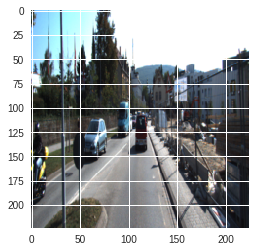

In [0]:
plt.imshow(sample_img)

(1, 224, 224, 2)


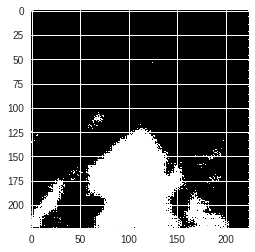

In [0]:
print(yhat.shape)
plt.imshow(yhat[0,:,:,0])